# Training a Neural Network with PyTorch

In [1]:
#once 
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2022-01-24 20:57:14--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-01-24 20:57:14--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.19MB/s    in 2m 40s  

2022-01-24 20:59:54 (5.14 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Starting train_and_eval_model function
epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
Last epochs values: train_loss: 0.45 val_loss: 0.66 train_accuracy: 82.54 % val_accuracy 72.80 %


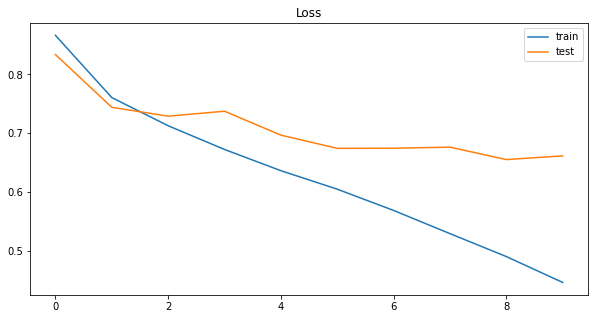

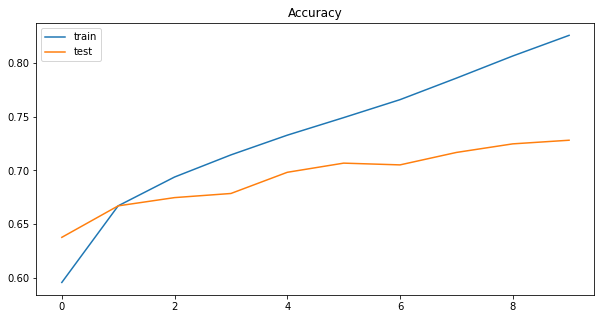

Ploting ROC for second neural model
Printing roc curve for HW3


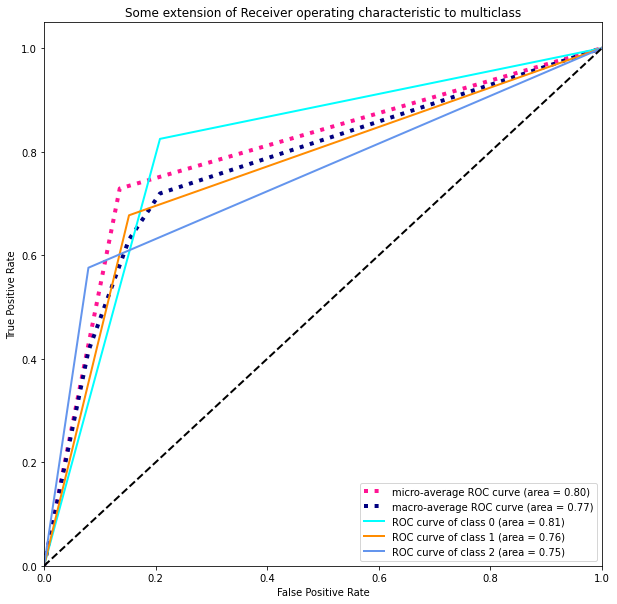

Training HW2 model

Homework 1 model
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1065
           1       0.68      0.38      0.49       296
           2       0.68      0.76      0.72       921

    accuracy                           0.72      2282
   macro avg       0.71      0.64      0.66      2282
weighted avg       0.72      0.72      0.72      2282


Homework2 model
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1065
           1       0.50      0.23      0.32       296
           2       0.64      0.75      0.69       921

    accuracy                           0.69      2282
   macro avg       0.64      0.58      0.59      2282
weighted avg       0.68      0.69      0.68      2282


Homework3 model
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1065
           1       0.68      0.80      0.73       921
    

In [83]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from nltk.tokenize import word_tokenize,TweetTokenizer
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import torch.nn.functional as nnf
from sklearn.metrics import roc_curve,classification_report,auc
from sklearn.preprocessing import label_binarize
from numpy import interp
from itertools import cycle
from torchtext import vocab
from torchtext.legacy.data import Field,LabelField,BucketIterator,TabularDataset
import warnings
import spacy
import nltk
import os
import random

def set_seed(seed = 4321):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed()

nltk.download('punkt')

epochs=10

device = torch.device('cuda:0' if torch.cuda.is_available()else 'cpu')
    

#Reading a csv files with pandas only needs two lines of code
df = pd.read_csv("./vaccine_train_set.csv",index_col=0)
val = pd.read_csv("./vaccine_validation_set.csv",index_col=0)

#for hw1 model######################################################################
X_train = df['tweet']
Y_train = df['label']

X_test = val['tweet']
Y_test  = val['label']
vectorizer = TfidfVectorizer(min_df = 0.001)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
# loading train, test and validation data 
clf =LogisticRegression(max_iter=1000,C=1,penalty='l2',solver='liblinear')
clf.fit(X_train, Y_train)

#Now that we have trained the classifer, we can make predictions on the unseen data
Y_test_pred = clf.predict(X_test)
#Let's also make predictions on the train set for reference
Y_train_pred = clf.predict(X_train)
#####################################################################################
###Clean Data

df['tweet'] = df['tweet'].str.lower()  # easier to clean 
val['tweet'] = val['tweet'].str.lower()

#removes special characters from a sentence
def rm_s_ch(tweet):
    tweet=re.sub(r'[^a-zA-z0-9\s]','',tweet)
    return tweet

def remove_links(tweet):
    tweet = re.sub(r'https\S+', '', tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'www.\S+', '', tweet)
    return tweet

df['tweet'] = df['tweet'].apply(lambda x:''.join([i for i in x if i not in string.punctuation])) #remove !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
val['tweet']=val['tweet'].apply(lambda x:''.join([i for i in x if i not in string.punctuation])) #remove !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~

df['tweet']=df['tweet'].apply(rm_s_ch)
val['tweet']=val['tweet'].apply(rm_s_ch) 

df['tweet'] = df['tweet'].apply(lambda x: re.compile(r'<[^>]+>').sub('', x))
val['tweet']=val['tweet'].apply(lambda x: re.compile(r'<[^>]+>').sub('', x)) 

df['tweet']=df['tweet'].apply(remove_links)
val['tweet']=val['tweet'].apply(remove_links) 

df2=df
val2=val

df.to_csv('train.csv',index=False)
val.to_csv('val.csv',index=False)


spacy_eng = spacy.load('en')

def tokenizer(text): # create a tokenizer function
    return [w.text for w in spacy_eng.tokenizer(text)]


text_field = Field(tokenize=tokenizer, lower=True)#(tokenize=word_tokenize)
label_field = LabelField(dtype=torch.long)

fields=[('Text', text_field), ('Label', label_field)]
train, val = TabularDataset.splits(path="", train='train.csv',validation='val.csv',format='csv',skip_header=True,fields=fields)

glove = vocab.Vectors('glove.6B.100d.txt',"OUT")

text_field.build_vocab(train,vectors=glove) 
label_field.build_vocab(train) 


train_iter,val_iter=BucketIterator.splits((train,val), batch_sizes=(32,128),sort_key=lambda x: len(x.Text),sort_within_batch=False,device=device) 

class ModelHW3(torch.nn.Module):
    
    def __init__(self,in1,emb_dim=100,hs=256,out=3,mtype='LSTM',drop_val=0.45,n_stlayers=2):

        super(ModelHW3,self).__init__()
  
        self.embedding = torch.nn.Embedding(in1,emb_dim)
        self.dropout = torch.nn.Dropout(drop_val) 
        self.mtype = mtype
        
        if self.mtype == 'LSTM':
            self.LSTM = torch.nn.LSTM(emb_dim,hs,num_layers=n_stlayers,bidirectional=True)
        else:
            self.GRU = torch.nn.GRU(emb_dim,hs,num_layers=n_stlayers,bidirectional=True)

        self.dropout2 = torch.nn.Dropout(drop_val) 
        self.linear = torch.nn.Linear(hs*2,out)

    def forward(self,x):
        l1=self.embedding(x)
        l2 = self.dropout(l1)
        if self.mtype == 'LSTM':
            _, (hidden,_) = self.LSTM(l2)
        else:
            _, hidden = self.GRU(l2)
        
        l3 = self.dropout2(torch.cat((hidden[-2,:,:],hidden[-1,:,:]),dim=1))
        return self.linear(l3)

in1 = len(text_field.vocab)

emb_dim = 100
drop_val = 0.5


modelHW3 =  ModelHW3(in1,mtype='LSTM',out=3)
modelHW3.to(device)

optimizer = torch.optim.Adam(modelHW3.parameters(),lr=0.0003) 
loss_fn =  torch.nn.CrossEntropyLoss().to(device)

pretrained_embeddings = text_field.vocab.vectors
modelHW3.embedding.weight.data.copy_(pretrained_embeddings) #copy embeddings as the weights to the layer


unknown_index = text_field.vocab.stoi[text_field.unk_token] # get index of unknown token
padding_index = text_field.vocab.stoi[text_field.pad_token] # get index of padding token

modelHW3.embedding.weight.data[unknown_index] = torch.zeros(emb_dim) #change values to zeros
modelHW3.embedding.weight.data[padding_index] = torch.zeros(emb_dim)

def train_and_eval_model(modelHW3,train_iter,optimizer,loss_fn,val_test_iter,device,grad_clip_val):
    
    train_loss = 0
    train_acc = 0 

    modelHW3.train() 
    
    for batch in train_iter: 

        batch.Text=batch.Text.to(device)
        batch.Label=batch.Label.to(device)
        optimizer.zero_grad()
        
        predictions = modelHW3(batch.Text).squeeze(1) 
        
        loss = loss_fn(predictions,batch.Label.long())
        
        y_pred_1d=[[predictions[i][0],predictions[i][1],predictions[i][2]].index(max([predictions[i][0],predictions[i][1],predictions[i][2]]))for i in range(len(predictions))]
        
        y_pred_1d=torch.tensor(y_pred_1d)
        y_pred_1d=y_pred_1d.to(device)
        c = (batch.Label == y_pred_1d).float() 
        accuracy=c.sum() / len(c)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(modelHW3.parameters(),grad_clip_val)
        optimizer.step()
        
        train_loss += loss.item()
        train_acc += accuracy.item()
 
    val_loss = 0
    val_acc = 0
    
    modelHW3.eval() # set the model in evaluation mode to not compute gradients and reduce overhead
    
    with torch.no_grad(): # turn of gradients calculation
        for batch in val_test_iter:
            batch.Text=batch.Text.to(device)
            batch.Label=batch.Label.to(device)
            predictions = modelHW3(batch.Text).squeeze(1)

            loss = loss_fn(predictions,batch.Label.long())

            y_pred_1d=[[predictions[i][0],predictions[i][1],predictions[i][2]].index(max([predictions[i][0],predictions[i][1],predictions[i][2]]))for i in range(len(predictions))]
            
            y_pred_1d=torch.tensor(y_pred_1d)
            y_pred_1d=y_pred_1d.to(device)
            c = (batch.Label == y_pred_1d).float() 
            accuracy=c.sum() / len(c)

            val_loss += loss.item() 
            val_acc += accuracy.item()

    return train_loss/len(train_iter), train_acc/len(train_iter),val_loss/len(val_test_iter), val_acc/len(val_test_iter)

train_loss_plt = list()
train_acc_plt = list()
    
val_loss_plt = list()
val_acc_plt = list()

print("Starting train_and_eval_model function")
for epoch in range(epochs):
    train_loss, train_acc,val_loss,val_acc = train_and_eval_model(modelHW3,train_iter,optimizer,loss_fn,val_iter,device,3)
    train_loss_plt.append(np.mean(train_loss))
    train_acc_plt.append(np.mean(train_acc))
    val_loss_plt.append(np.mean(val_loss))
    val_acc_plt.append(np.mean(val_acc))
    print("Epoch:",epoch+1," train_loss:","{:.2f}".format(train_loss),"val_loss:","{:.2f}".format(val_loss),"train_accuracy:","{:.2f}".format(train_acc*100),"%","val_accuracy","{:.2f}".format(val_acc*100),"%")


plt.figure(figsize=(10, 5))
plt.title('Loss')
plt.plot(range(len(train_loss_plt)), train_loss_plt, label='train')
plt.plot(range(len(val_loss_plt)), val_loss_plt, label='test')
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.title('Accuracy')
plt.plot(range(len(train_acc_plt)), train_acc_plt, label='train')
plt.plot(range(len(val_acc_plt)), val_acc_plt, label='test')
plt.legend()
plt.show()

print("Ploting ROC for second neural model")
# Get predictions of our best model.

y_score = list()
y_val = list()

with torch.no_grad():
  for batch in val_iter:
      for label in batch.Label:
          y_val.append(label.item())
      batch.Text=batch.Text.to(device)
      predictions = modelHW3(batch.Text).squeeze(1)
      y_pred_1d_val=[[predictions[i][0],predictions[i][1],predictions[i][2]].index(max([predictions[i][0],predictions[i][1],predictions[i][2]]))for i in range(len(predictions))]
      for target in y_pred_1d_val:
        y_score.append(target)

clasf1=y_val
clasf2=y_score


print("Printing roc curve for HW3")
y_val = np.array(y_val)
y_val = label_binarize(y_val, classes=[0, 1, 2])

y = y_score
y = np.array(y)

y_test = label_binarize(y, classes=[0, 1, 2])
n_classes = y_test.shape[1]


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_val[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_val.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"],tpr["micro"],label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),color="deeppink",linestyle=":",linewidth=4,)
plt.plot(fpr["macro"],tpr["macro"],label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),color="navy",linestyle=":",linewidth=4,)

lw=2
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i],tpr[i],color=color,lw=lw,label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()


X_train = df2['tweet']
Y_train = df2['label']

X_test = val2['tweet']
Y_test  = val2['label']

df2['tweet'] = [word_tokenize(i) for i in df2['tweet']]
val2['tweet'] = [word_tokenize(i) for i in val2['tweet']]

max_length = 100
embeddings_index = {}
f = open('glove.6B.'+str(max_length)+'d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

def get_pretrained(dataset,maxlen):
  matrix_len = dataset['tweet'].str.len().sum()
  averaged_tweets = []

  for i,sentence in enumerate(dataset['tweet']):
    weight_matrix = np.zeros((len(sentence),maxlen))
    for j,word in enumerate(sentence): 
      if word in embeddings_index:
        weight_matrix[j] = embeddings_index[word]
    averaged_tweets.append(np.mean(weight_matrix,axis=0))            # averaging with np.mean to get equal dimensions

  return np.array(averaged_tweets)


X_train_glove = get_pretrained(pd.DataFrame(df2),max_length)
X_test_glove = get_pretrained(pd.DataFrame(val2),max_length)

X_train_glove  = torch.tensor(X_train_glove)
X_test_glove = torch.tensor(X_test_glove)

Y_train = torch.squeeze(torch.from_numpy(Y_train.to_numpy()).float())
Y_test = torch.squeeze(torch.from_numpy(Y_test.to_numpy()).float())

class Net_2(nn.Module):
    def __init__(self, D_in, H1,H2,H3,D_out):
        super(Net_2, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.ReLU1 = nn.ReLU()
        self.linear2 = nn.Linear(H1, H2)
        self.ReLU2 = nn.ReLU()
        self.linear3 = nn.Linear(H2,H3)
        self.ReLU3 = nn.ReLU()
        self.linear4 = nn.Linear(H3, D_out)

    def forward(self, x):
        h1 = self.linear1(x)
        h2 = self.ReLU1(h1)
        h3 = self.linear2(h2)
        h4 = self.ReLU2(h3)
        h5 = self.linear3(h4)
        h6 = self.ReLU3(h5)
        out = self.linear4(h6)
        return  nnf.softmax(out, dim=1)

#Define layer sizes
D_in = X_train_glove.shape[1]
H1 = 90
H2 = 60
H3 = 30
D_out = 3

#Define Hyperparameters
learning_rate =0.0001

#Initialize model, loss, optimizer
model2 = Net_2(D_in, H1, H2,H3,D_out)
model2
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)
# Initialize dataloader
dataset = torch.utils.data.TensorDataset(X_train_glove, Y_train)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)


Loss=[]
valLoss=[]
accuracy=[]
valaccuracy=[]
print("Training HW2 model")
for epoch in range(50):
  batch_losses = []
  correct=0
  for x_batch, y_batch in dataloader:
    y_pred = model2.forward(x_batch.float())
    y_batch_n = label_binarize(y_batch, classes=[0, 1, 2])
    y_batch_n=torch.tensor(y_batch_n)

    loss = loss_func(y_pred,y_batch_n.float())
    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    y_pred_1d=[[y_pred[i][0],y_pred[i][1],y_pred[i][2]].index(max([y_pred[i][0],y_pred[i][1],y_pred[i][2]]))for i in range(len(y_pred))]
    
    y_pred_1d=torch.tensor(y_pred_1d)

    c = (y_batch == y_pred_1d).float() 
    correct+=c.sum() / len(c)

  Loss.append(sum(batch_losses)/len(dataloader))
  accuracy.append(correct/len(dataloader))


print("\nHomework 1 model")
print(classification_report(Y_test,Y_test_pred,labels=np.unique(Y_test_pred)))

y_pred_val = model2.forward(X_test_glove.float())
y_pred_val = torch.squeeze(y_pred_val)
y_pred_1d_val=[[y_pred_val[i][0],y_pred_val[i][1],y_pred_val[i][2]].index(max([y_pred_val[i][0],y_pred_val[i][1],y_pred_val[i][2]]))for i in range(len(y_pred_val))]
y_pred_1d_val=torch.tensor(y_pred_1d_val)
y_pred_1d_val = y_pred_1d_val.cpu()

y_pred_1d_val=[[y_pred_val[i][0],y_pred_val[i][1],y_pred_val[i][2]].index(max([y_pred_val[i][0],y_pred_val[i][1],y_pred_val[i][2]]))for i in range(len(y_pred_val))]

print("\nHomework2 model")
print(classification_report(Y_test,y_pred_1d_val,labels=np.unique(y_pred_1d_val)))


print("\nHomework3 model")
print(classification_report(clasf1,clasf2,labels=np.unique(clasf2)))